# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
# datapath = os.path.join("sample_data","")
# filename = "insurance.csv"
# med_costs = pd.read_csv(datapath+filename)
med_costs = pd.read_csv('C://Users//avons//Downloads//insurance.csv')
# med_costs_size = os.path.getsize(datapath+filename)
# med_costs_size = med_costs_size/(1024*1024)
# print(med_costs_size) #0.053050994873046875 MB
print("Number of Entries: " + str(len(med_costs))) #1338
print("Number of Features: " + str(len(med_costs.columns))) #7
med_costs.select_dtypes(include=['object']).columns.tolist() #['sex', 'smoker', 'region']
med_costs.isnull().sum()  #no missing values
med_costs.describe() 
"""
age: mean = 39.207; std = 14.0499; min=18; 25% = 27; 50% = 39; 75% = 51; max = 64
bmi: mean = 30.663; std = 6.098187; min=15.96; 25% = 26.296250; 50% = 30.400000; 75% = 34.693750; max = 53.130000
charges: mean = 13270.422265; std = 12110.011237; min= 1121.873900; 25% = 4740.287150; 50% = 9382.033000; 75% = 16639.912515
; max = 63770.428010
children: mean = 1.094918; std = .1.205493; min=0.000000; 25% = 0.000000; 50% = 1.000000	; 75% = 2.000000; max = 5.000000

"""

Number of Entries: 1338
Number of Features: 7


'\nage: mean = 39.207; std = 14.0499; min=18; 25% = 27; 50% = 39; 75% = 51; max = 64\nbmi: mean = 30.663; std = 6.098187; min=15.96; 25% = 26.296250; 50% = 30.400000; 75% = 34.693750; max = 53.130000\ncharges: mean = 13270.422265; std = 12110.011237; min= 1121.873900; 25% = 4740.287150; 50% = 9382.033000; 75% = 16639.912515\n; max = 63770.428010\nchildren: mean = 1.094918; std = .1.205493; min=0.000000; 25% = 0.000000; 50% = 1.000000\t; 75% = 2.000000; max = 5.000000\n\n'

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING 

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

      age     sex     bmi  children smoker     region      charges
560    46  female  19.950         2     no  northwest   9193.83850
1285   47  female  24.320         0     no  northeast   8534.67180
1142   52  female  24.860         0     no  southeast  27117.99378
969    39  female  34.320         5     no  southeast   8596.82780
486    54  female  21.470         3     no  northwest  12475.35130
...   ...     ...     ...       ...    ...        ...          ...
1095   18  female  31.350         4     no  northeast   4561.18850
1130   39  female  23.870         5     no  southeast   8582.30230
1294   58    male  25.175         0     no  northeast  11931.12525
860    37  female  47.600         2    yes  southwest  46113.51100
1126   55    male  29.900         0     no  southwest  10214.63600

[1070 rows x 7 columns]


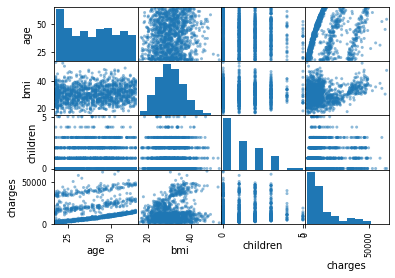

In [2]:
# You might want to use the following package
import sklearn
from numpy import array
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Your code goes here for this section.
scatter_matrix(med_costs)
train_set, test_set = train_test_split(med_costs, test_size=0.2, random_state=42)
train_set = pd.DataFrame(train_set)
test_set = pd.DataFrame(test_set)
print(train_set)
X_train = train_set.drop("charges",axis=1) #train features
y_train = train_set["charges"].copy().to_numpy() #train label
X_test = test_set.drop("charges",axis=1)#test features
y_test = test_set["charges"].copy().to_numpy()#test label
# sample_incomplete_rows = [X_train.isnull().any(axis=1)].head()
# sample_incomplete_rows
#imputer
imputer = SimpleImputer(strategy='mean')
med_num = X_train.select_dtypes(include=[np.number])
imputer.fit(med_num)
imputer.statistics_
temp = imputer.transform(med_num)
imputer.strategy
med_tr = pd.DataFrame(temp,columns=med_num.columns,index=X_train.index)



#OneHotEncoding categorical values
encoder = OneHotEncoder()
med_cat = X_train[["sex","smoker","region"]]
med_cats_1hot = encoder.fit_transform(med_cat)
encoder.categories_

#pipeline
med_num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),('stdscaler',StandardScaler())])
med_costs_num_tr = med_num_pipeline.fit_transform(med_num)
med_costs_num_tr

#transform X_train happens here
num_attribs = list(med_num)
cat_attribs = ["sex","smoker","region"]
full_pipeline = ColumnTransformer([("num",med_num_pipeline,num_attribs),("cat",OneHotEncoder(),cat_attribs),])
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)
#y_train = full_pipeline.fit_transform(y_train)
#print(med_prepped)
#med_prepped_test = full_pipeline.fit_transform(X_test)

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT 
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [10]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
    def __init__ (self):
        """
        Initialize the regressor
        """
        self.theta = []; # parameter vector; #list of all parameters, should have 7 because 7 features
        self.alpha = 0.1; # learning rate
        self.cost = []
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        """
        Implementatation of the gradient descent
        INPUT:
        alpha: the learning rate
        iters: number of iterations

        OUTPUT: 
        theta: updated value for theta
        cost: value of the cost function
        """ 
        X_df = np.c_[np.ones((len(X_train),1)),X_train]
        print(X_df)
        self.theta = np.random.rand(len(X_df[1,:]))
        for iteration in range(iters):
            gradients = 2/(len(X_df[:,1])) * X_df.T.dot(X_df.dot(self.theta) - y_train[:])
            self.theta = self.theta - alpha*gradients
        m = len(X_df)
        for i in range(len(X_df)):
            pred_params = X_df[i,:]
#             print(i)
#             print(pred_params)
#             print(y_train[i])
            temp = (self.theta.dot(self.predict(pred_params)-y_train[i])**2)/m
            #np.power(float(self.theta.dot(self.predict(pred_params) - y_train[i,0]))),2)/m
            self.cost = np.append(self.cost,temp)
        return self.cost,self.theta

    def fitUsingGradientDescent(self, X_train, y_train):
        """
        Train the regressor using gradient descent
        """
    # implementation code here
        return self.gradientDescent(X_train, y_train, self.theta, self.alpha, 10000)

    def fitUsingNormalEquation(self, X_train, y_train):
        """
        Training using the Normal (close form) equation
        """
        X_train = np.c_[np.ones((len(X_train),1)),X_train]
        self.theta = np.random.rand(len(X_train[1,:]))
        
    # implementation code here for Task 4.
        self.theta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train);

    def predict(self, X_test):
        """
        Predicting the label
        """
    # implementation code here 
        if len(X_test) != len(self.theta):
            X_test = np.c_[np.ones((len(X_test),1)),X_test]
            y_predict = X_test.dot(self.theta)
            return y_predict
        else:
            return X_test.dot(self.theta)

    def __str__(self):
        """
        Print out the parameter out when call print()
        """
        return("Parameter vector is %f" % self.theta)   
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
#X_train = full_pipeline.fit_transform(X_train) #pipeline issue, change column name calls to index based to avoid this issue
grad_cost,grad_theta = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)

[[ 1.          0.47222651 -1.75652513 ...  1.          0.
   0.        ]
 [ 1.          0.54331294 -1.03308239 ...  0.          0.
   0.        ]
 [ 1.          0.8987451  -0.94368672 ...  0.          1.
   0.        ]
 ...
 [ 1.          1.3252637  -0.89153925 ...  0.          0.
   0.        ]
 [ 1.         -0.16755139  2.82086429 ...  0.          0.
   1.        ]
 [ 1.          1.1120044  -0.10932713 ...  0.          0.
   1.        ]]


* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

Text(0.5, 1.0, 'Error vs. Training Iterations')

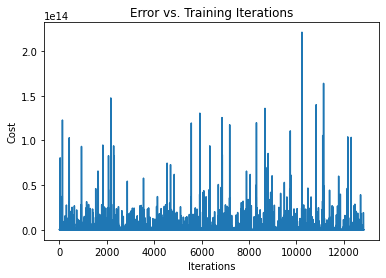

In [5]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#
import matplotlib.pyplot as plt
plt.plot(grad_cost)
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [6]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)


- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS 

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [12]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
#x_sgd = full_pipeline.transform(X_train)
mySGDModel.fit(X_train,y_train)
#x_test_sgd = pd.DataFrame(x_test_sgd)
#X_test = full_pipeline.transform(X_test)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)
#med_prepped_test = pd.DataFrame(med_prepped_test)
lin_reg = MyLinearRegression()
lin_reg.fitUsingGradientDescent(X_test,y_test)
y_predict_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test,y_predict_lin)
myGradientDescentModel_rmse = np.sqrt(mse_lin)
print(myGradientDescentModel_rmse)
#print(x_test_sgd)
lin_reg.fitUsingNormalEquation(X_test,y_test)

y_predict_norm = lin_reg.predict(X_test)
mse_norm = mean_squared_error(y_test,y_predict_norm)
myNormalEquationModel_rmse = np.sqrt(mse_norm)
print(myNormalEquationModel_rmse)
#myGradientDescentModel_rmse  
#myNormalEquationModel_rmse 



5794.869421453266
[[ 1.          0.45859585 -0.93715188 ...  0.          0.
   0.        ]
 [ 1.         -0.18713281 -0.16752679 ...  1.          0.
   0.        ]
 [ 1.          1.82180078 -0.66551949 ...  1.          0.
   0.        ]
 ...
 [ 1.         -0.04363755 -0.48443124 ...  0.          0.
   0.        ]
 [ 1.          1.1043245   2.59486336 ...  0.          1.
   0.        ]
 [ 1.          0.88908162  0.49646348 ...  0.          0.
   1.        ]]
5712.020722977795
5712.020722977795


- - -
## Task 6. PRESENT YOUR SOLUTION 

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

# Your paragraph goes here for this section
We can pitch this solution to this project as one that takes relevant parameters about a patients health and creates a pretty accurate prediction as to the charges their insurance may face if they visit a hospital. I learned that on average if you have higher risk factors such as BMI and are a smoker, your charges tend to be higher than those who don't smoke and have lower  BMI. I've learned that the charges can vary wildly between two patients based on only a few factors but there can be other factors at play such as what treatments they recieved and where they recieved treatment. Some insight into improving the solution would be to add a category about whether a visit was for an inpatient or outpatient visit as that can change up the cost by a lot. Another insight which would be useful is to see whether procedures were emergency or elective procedures. 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!